# Retroactive Priority Queue (RPQ)

In [ ]:
class nodeq():
    def __init__(self):
        self.type = int()
        self.val = (0,)
        self.time = float()
        self.left = None
        self.right = None

class node():
    def __init__(self):
        self.val = (0,)
        self.lt = self.rt = None
        self.link = nodeq()

class queue():
    def __init__(self):
        self.front = None
        self.back = None
        self.t = float()

    def show_op(self):
        temp=self.back
        while(temp):
            if(temp.type==-1):
                print("insert(del_min() ,t=%.2f)\n" %temp.time)
            else:
                print("insert(insert(%s),t=%.2f)\n" %(str(temp.val), temp.time))
            temp = temp.right

    def delete(self, tp):
        if(tp==None):
            return
        if(tp.left!=None):
            tp.left.right = tp.right
        if(tp.right!=None):
            tp.right.left = tp.left

    def dlt(self, bst, q, tm):
        temp = self.back
        while(temp):
            if(temp.time==tm):
                if(temp.type==-1):
                    bst = maxk(bst, self.back, temp)
                elif(temp.type==0):
                    bst = del_tree(bst,temp.val)
                else:
                    bst, q = mink(bst, q, self.back, temp)
                
                if(temp.left!=None):
                    temp.left.right = temp.right
                if(temp.right!=None):
                    temp.right.left = temp.left
                if(temp.left==None and temp.right!=None):
                    self.back = temp.right
                if(temp.left!=None and temp.right==None):
                    self.front = temp.left
                if(temp.left==None and temp.right==None):
                    self.back = None
                break
            temp = temp.right
        return bst, q

    def insert_insert(self, bst, v):
        p = nodeq()
        p.type=1
        p.val=v 
        p.left=self.front
        p.right = None
        p.time = self.t
        self.t+=1

        if(self.front!=None):
            self.front.right = p
        self.front = p
        bst = insert_tree(bst,v,p)
        if(self.back==None):
            self.back = self.front
        return bst

    def insert_insert_t(self, bst, v, tm):
        p = nodeq()
        if(tm>self.t):
            print("exceeding current time hence no operation \n")
            return bst
        p.type = 1
        p.val = v
        p.time = tm
        if(self.back==None):
            p.left = self.front
            p.right = None
            self.front = p
            self.back = p
        else:
            temp = self.back
            while(temp.time<tm and temp.right!=None):
                temp=temp.right
            if(tm>temp.time and temp.right==None):
                temp.right=p
                p.left=temp
                p.right=None
                self.front=p
            else:
                if(temp.left==None):
                    self.back=p
                else:
                    temp.left.right=p
                p.left=temp.left
                temp.left=p
                p.right=temp
        return maxk(bst, self.back, p)

    def insert_del(self, bst):
        if(find_min(bst)==-1):
            return bst
        p = nodeq()
        p.type=-1
        p.left=self.front
        p.right=None
        p.time=self.t
        self.t+=1
        if(self.front!=None):
            self.front.right=p
        self.front=p
        bst = del_tree(bst,find_min(bst))
        if(self.back==None):
            self.back=self.front
        return bst

    def insert_del_t(self, bst, q, tm):
        p = nodeq()
        if(tm>self.t):
            print("exceeding current time hence no operation \n")
            return bst
        p.type = -1
        p.time = tm
        if(self.back==None):
            p.left = self.front
            p.right = None
            self.front = p
            self.back = p
        else:
            temp = self.back
            while(temp.time<tm and temp.right!=None):
                temp=temp.right
            if(tm>temp.time and temp.right==None):
                temp.right=p
                p.left=temp
                p.right=None
                self.front=p
            else:
                if(temp.left==None):
                    self.back=p
                else:
                    temp.left.right=p
                p.left=temp.left
                temp.left=p
                p.right=temp
        return mink(bst, q, self.back, p)

############################################################################################################################

def insert_tree(root, v, ptr):
    p = node()
    p.val = v
    ptr.type = 0
    p.link = ptr

    if(root==None):
        root = p
        return root
    
    temp = root

    while(temp):
        if(temp.val >= v):
            if(temp.lt != None):
                temp = temp.lt
            else:
                temp.lt = p
                break
        else:
            if(temp.rt != None):
                temp = temp.rt
            else:
                temp.rt = p
                break
    return root

def del_tree(root, v):
    r = root
    par = None
    x = None
    found = 0

    while(r!=None):
        if(r.val==v):
            found = 1
            x = r
            break
        par = r
        if(r.val > v):
            r = r.lt
        else:
            r = r.rt
    
    if(found==0):
        return root
    x.link.type = 1

    if(x.lt!=None and x.rt!=None):
        par = x
        xsucc = x.rt
        while(xsucc.lt!=None):
            par = xsucc
            xsucc = xsucc.lt
        x.val = xsucc.val
        x = xsucc
    
    if(par==None):
        if(x.lt==None and x.rt==None):
            root = None
        elif(x.lt==None and x.rt!=None):
            root = x.rt
        elif(x.lt!=None and x.rt==None):
            root = x.lt
        return root
    
    if(x.lt==None and x.rt==None):
        if(par.rt==x):
            par.rt=None
        else:
            par.lt=None
        return root
    
    if(x.lt==None and x.rt!=None):
        if(par.lt==x):
            par.lt=x.rt
        else:
            par.rt=x.rt
        return root

    if(x.lt!=None and x.rt==None):
        if(par.lt==x):
            par.lt=x.lt
        else:
            par.rt=x.lt
        return root

    return root

def maxk(bst, start, cu):
    sum = 0
    st = start
    if(st==None):
        return bst
    temp=None

    while(st!=cu and st!=None):
        sum+=st.type
        if(sum==0):
            temp = st
        st=st.right
    
    if(temp==None):
        temp=start
    else:
        temp = temp.right
    
    if(cu.type!=-1):
        max = cu.val
    else:
        max = (float('-inf'),)

    while(temp):
        if(temp.type==1 and temp.val>max):
            cu = temp
            max = temp.val
        temp = temp.right
    cu.type = 0

    return insert_tree(bst, cu.val, cu)

def mink(bst, q, st, cu):
    flag = 0
    sum = 0
    min = (float('inf'),)
    if(st==None):
        return bst, q
    
    temp = None
    temp2 = None

    while(st!=None):
        if(st==cu):
            flag=1
        else:
            sum+=st.type
        if(sum==0 and flag==1):
            temp=st
            break
        st=st.right

    if(temp==None):
        temp = cu
        while(temp.right!=None):
            temp = temp.right
        print("temp==Null")

    while(temp):
        if(temp.type==0 and temp.val<min):
            temp2=temp
            min=temp.val
        temp=temp.left
    
    if(temp2!=None):
        temp2.type=1
        bst = del_tree(bst, temp2.val)
    else:
        q.delete(cu)
    return bst, q

def show_queue(root):
    if(root):
        show_queue(root.lt)
        print(f"{root.val}->", end=" ")
        show_queue(root.rt)

def find_min(p):
    if(p==None):
        return -1
    while(p.lt!=None):
        p=p.lt
    return p.val

In [ ]:
bst = None
q = queue()
print("******************************************************************\n"
            "For normal priority queue operations: \n\n"
            "Enter 1 for find-min operation\n"
            "Enter 2 for insert operation\n"
            "Enter 3 for del-min operation\n\n"
            "For Retroactive priority queue operations: \n\n"
            "Enter 4 for inserting a insert operation at any given time\n"
            "Enter 5 for inserting a del-min operation at any given time\n"
            "Enter 6 for deleting any operation at any given time\n\n"
            "Enter 7 for quit\n"
      "******************************************************************\n")
while(1):
    print("\n******************************************************************\n")
    inp = int(input("Choose an operation: "))

    if(inp==1):
        if(find_min(bst)!=-1):
            print("Minimum Element is : ",find_min(bst))
        else:
            print("No element in Queue")
    elif(inp==2):
        print("Enter value for inserting\n")
        val = float(input())
        bst = q.insert_insert(bst, (val,))
    elif(inp==3):
        bst = q.insert_del(bst)
    elif(inp==4):
        print("Enter value and time of inserting\n")
        val = float(input())
        time = float(input())
        bst = q.insert_insert_t(bst,(val,),time)
    elif(inp==5):
        print("Enter time for inserting del-min\n")
        time = float(input())
        bst, q = q.insert_del_t(bst, q, time)
    elif(inp==6):
        print("Enter time for deletion of operation\n")
        time = float(input())
        bst, q = q.dlt(bst, q, time)
    else:
        break

    print("Total list of operations are :\n")
    q.show_op()
    print("Elements in current queue are (in increasing order):\n")
    show_queue(bst)

******************************************************************
For normal priority queue operations: 

Enter 1 for find-min operation
Enter 2 for insert operation
Enter 3 for del-min operation

For Retroactive priority queue operations: 

Enter 4 for inserting a insert operation at any given time
Enter 5 for inserting a del-min operation at any given time
Enter 6 for deleting any operation at any given time

Enter 7 for quit
******************************************************************


******************************************************************

Choose an operation: 2
Enter value for inserting

12
Total list of operations are :

insert(insert((12.0,)),t=0.00)

Elements in current queue are (in increasing order):

(12.0,)-> 
******************************************************************

Choose an operation: 2
Enter value for inserting

17
Total list of operations are :

insert(insert((12.0,)),t=0.00)

insert(insert((17.0,)),t=1.00)

Elements in current queue are (

# Dynamic Dijkstra Algorithm

In [ ]:
# import priorityQueue as pq
from collections import defaultdict
import time

class Graph:
    def __init__(self):
        self.nodes = []
        self.edges = defaultdict(lambda: -1)
        self.visited = defaultdict(lambda: -1)

    def add_node(self, val):
        self.nodes.append(val)
        self.edges[val] = defaultdict(lambda: -1)

    def add_edge(self, u, v, weight):
        self.edges[u][v] = weight
        self.edges[v][u] = weight

def dijkstra(graph, start_vertex, q, bst=None, parent=None, cost=None, update=False):
    if (not update) or (start_vertex==update):
        cost = {v:float('inf') for v in graph.nodes}
        cost[start_vertex] = 0
        bst = None
        bst = q.insert_insert(bst, (0, start_vertex))
        parent = {v:[] for v in graph.nodes}
        graph.visited = defaultdict(lambda: -1)
    else:
        for key, value in graph.visited.items():
            if update == value:
                time = key
        while time <= q.t:
            bst, q = q.dlt(bst, q, time)
            time+=1
            if time in graph.visited:
                graph.visited.pop(time)

    while find_min(bst) != -1:
        _, current_vertex = find_min(bst)
        bst = q.insert_del(bst)
        graph.visited[q.t-1] = current_vertex

        for neighbor in graph.nodes:
            if graph.edges[current_vertex][neighbor] != -1:
                distance = graph.edges[current_vertex][neighbor]
                if neighbor not in graph.visited.values():
                    old_cost = cost[neighbor]
                    new_cost = cost[current_vertex] + distance
                    if new_cost < old_cost:
                        bst = q.insert_insert(bst,(new_cost, neighbor))
                        cost[neighbor] = new_cost
                        parent[neighbor] = current_vertex       
    
    return parent, cost, bst, q

def print_path(start, nodes, parent):
    print("\nSource to destination\t\tPath")
    for node in nodes:
        if node!=start:
            print("From %s to %s:\t"%(start,node), end="")
            temp = node
            path = []
            while(temp!=start):
                path.append(temp)
                temp = parent[temp]
                if not temp:
                    path = ["No path found"]
            path.append(temp)
            path.reverse()
            print(*path, sep=" -> ")

import networkx as nx
import matplotlib.pyplot as plt

def createGraph(graph):
    G = nx.DiGraph()
    G.add_nodes_from(graph.nodes)

    edges = []
    for u, ng in graph.edges.items():
        for v, w in ng.items():
            if w !=-1:
                edges.append((u, v, w))
    G.add_weighted_edges_from(edges)

    return G

In [ ]:
g = Graph()

g.add_node("Tamilnadu")
g.add_node("Karnataka")
g.add_node("Mumbai")
g.add_node("Telangana")
g.add_node("Kerala")

g.add_edge("Tamilnadu", "Karnataka", 1000)
g.add_edge("Tamilnadu", "Kerala", 3000)
g.add_edge("Tamilnadu", "Telangana", 1500)
g.add_edge("Karnataka", "Mumbai", 2000)
g.add_edge("Karnataka", "Telangana", 700)
g.add_edge("Mumbai", "Kerala", 2500)
g.add_edge("Kerala", "Telangana", 1200)

q = queue()
st_time = time.time()
parent, cost, bst, q = dijkstra(g, "Tamilnadu", q)
end_time = time.time() - st_time

print("Time taken:",end_time,"sec")
print("Parent ->",dict(parent))
print("Cost ->",dict(cost))
print_path("Tamilnadu", g.nodes, parent)

Time taken: 0.0001513957977294922 sec
Parent -> {'Tamilnadu': [], 'Karnataka': 'Tamilnadu', 'Telangana': 'Tamilnadu', 'Kerala': 'Telangana', 'Mumbai': 'Karnataka'}
Cost -> {'Tamilnadu': 0, 'Karnataka': 1000, 'Mumbai': 3000, 'Telangana': 1500, 'Kerala': 2700}

Source to destination		Path
From Tamilnadu to Karnataka:	Tamilnadu -> Karnataka
From Tamilnadu to Mumbai:	Tamilnadu -> Karnataka -> Mumbai
From Tamilnadu to Telangana:	Tamilnadu -> Telangana
From Tamilnadu to Kerala:	Tamilnadu -> Telangana -> Kerala


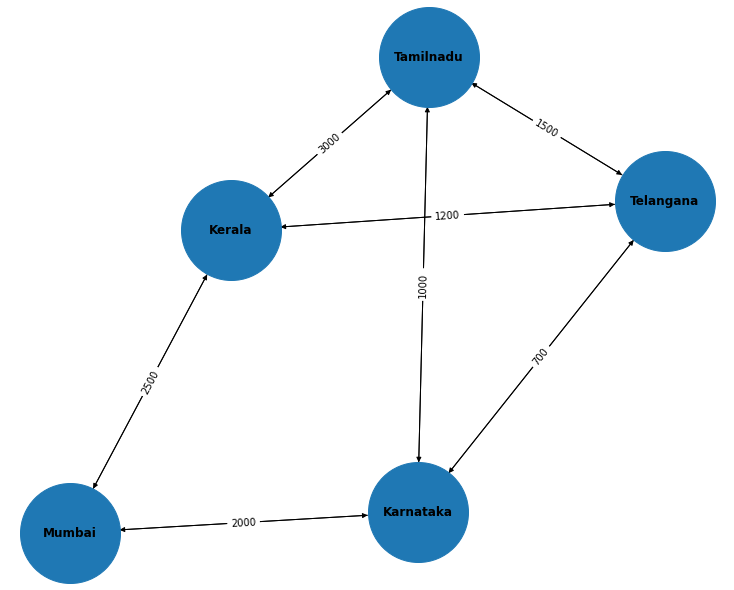

In [ ]:
G = createGraph(g)
plt.figure(figsize=(10,8))
pos = nx.spring_layout(G)
nx.draw(G, pos, node_size = 10000, with_labels=True, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'weight'))
plt.show()

# Updating Cost of Edge

In [ ]:
# Dynamic Dijkstra algorithm

g.add_edge("Karnataka", "Mumbai", 1000)

st_time = time.time()
parent1, cost1, bst1, q1 = dijkstra(g, "Tamilnadu", q, bst, parent, cost, update="Karnataka")
end_time = time.time() - st_time

print("Time taken:",end_time,"sec")
print("Parent ->",dict(parent1))
print("Cost ->",dict(cost1))
print_path("Tamilnadu", g.nodes, parent1)

Time taken: 0.00018668174743652344 sec
Parent -> {'Tamilnadu': [], 'Karnataka': 'Tamilnadu', 'Telangana': 'Tamilnadu', 'Kerala': 'Telangana', 'Mumbai': 'Karnataka'}
Cost -> {'Tamilnadu': 0, 'Karnataka': 1000, 'Mumbai': 2000, 'Telangana': 1500, 'Kerala': 2700}

Source to destination		Path
From Tamilnadu to Karnataka:	Tamilnadu -> Karnataka
From Tamilnadu to Mumbai:	Tamilnadu -> Karnataka -> Mumbai
From Tamilnadu to Telangana:	Tamilnadu -> Telangana
From Tamilnadu to Kerala:	Tamilnadu -> Telangana -> Kerala


In [ ]:
# Normal Dijkstra algorithm

st_time = time.time()
parent2, cost2, bst2, q2 = dijkstra(g, "Tamilnadu", q)
end_time = time.time() - st_time

print("Time taken:",end_time,"sec")
print("Parent ->",dict(parent2))
print("Cost ->",dict(cost2))
print_path("Tamilnadu", g.nodes, parent2)

Time taken: 0.00028443336486816406 sec
Parent -> {'Tamilnadu': [], 'Karnataka': 'Tamilnadu', 'Telangana': 'Tamilnadu', 'Kerala': 'Telangana', 'Mumbai': 'Karnataka'}
Cost -> {'Tamilnadu': 0, 'Karnataka': 1000, 'Mumbai': 2000, 'Telangana': 1500, 'Kerala': 2700}

Source to destination		Path
From Tamilnadu to Karnataka:	Tamilnadu -> Karnataka
From Tamilnadu to Mumbai:	Tamilnadu -> Karnataka -> Mumbai
From Tamilnadu to Telangana:	Tamilnadu -> Telangana
From Tamilnadu to Kerala:	Tamilnadu -> Telangana -> Kerala


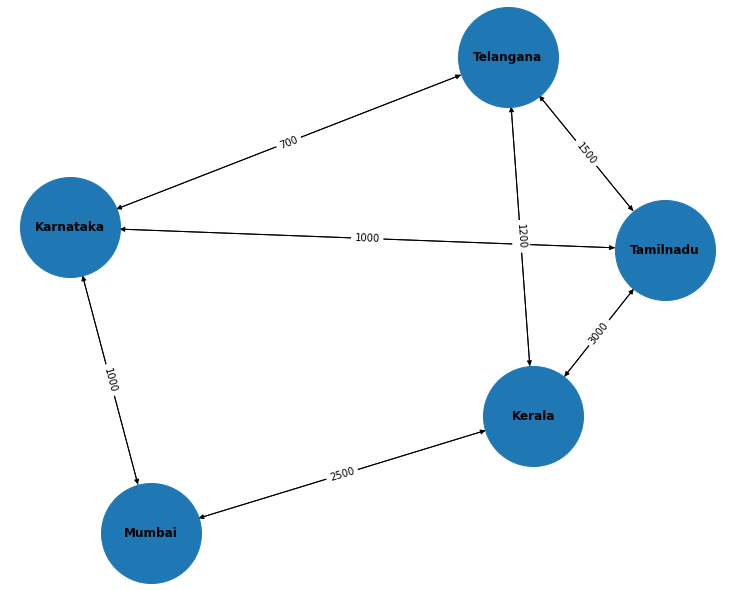

In [ ]:
G = createGraph(g)
plt.figure(figsize=(10,8))
pos = nx.spring_layout(G)
nx.draw(G, pos, node_size = 10000, with_labels=True, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'weight'))
plt.show()

# Adding new edge

In [ ]:
g.add_edge("Karnataka", "Kerala", 1000)

st_time = time.time()
parent1, cost1, bst1, q1 = dijkstra(g, "Tamilnadu", q, bst, parent, cost, update="Karnataka")
end_time = time.time() - st_time

print("Time taken:",end_time,"sec")
print("Parent ->",dict(parent1))
print("Cost ->",dict(cost1))
print_path("Tamilnadu", g.nodes, parent1)

Time taken: 0.00017547607421875 sec
Parent -> {'Tamilnadu': [], 'Karnataka': 'Tamilnadu', 'Telangana': 'Tamilnadu', 'Kerala': 'Karnataka', 'Mumbai': 'Karnataka'}
Cost -> {'Tamilnadu': 0, 'Karnataka': 1000, 'Mumbai': 2000, 'Telangana': 1500, 'Kerala': 2000}

Source to destination		Path
From Tamilnadu to Karnataka:	Tamilnadu -> Karnataka
From Tamilnadu to Mumbai:	Tamilnadu -> Karnataka -> Mumbai
From Tamilnadu to Telangana:	Tamilnadu -> Telangana
From Tamilnadu to Kerala:	Tamilnadu -> Karnataka -> Kerala


In [ ]:
st_time = time.time()
parent2, cost2, bst2, q2 = dijkstra(g, "Tamilnadu", q)
end_time = time.time() - st_time

print("Time taken:",end_time,"sec")
print("Parent ->",dict(parent2))
print("Cost ->",dict(cost2))
print_path("Tamilnadu", g.nodes, parent2)

Time taken: 0.00026154518127441406 sec
Parent -> {'Tamilnadu': [], 'Karnataka': 'Tamilnadu', 'Telangana': 'Tamilnadu', 'Kerala': 'Karnataka', 'Mumbai': 'Karnataka'}
Cost -> {'Tamilnadu': 0, 'Karnataka': 1000, 'Mumbai': 2000, 'Telangana': 1500, 'Kerala': 2000}

Source to destination		Path
From Tamilnadu to Karnataka:	Tamilnadu -> Karnataka
From Tamilnadu to Mumbai:	Tamilnadu -> Karnataka -> Mumbai
From Tamilnadu to Telangana:	Tamilnadu -> Telangana
From Tamilnadu to Kerala:	Tamilnadu -> Karnataka -> Kerala


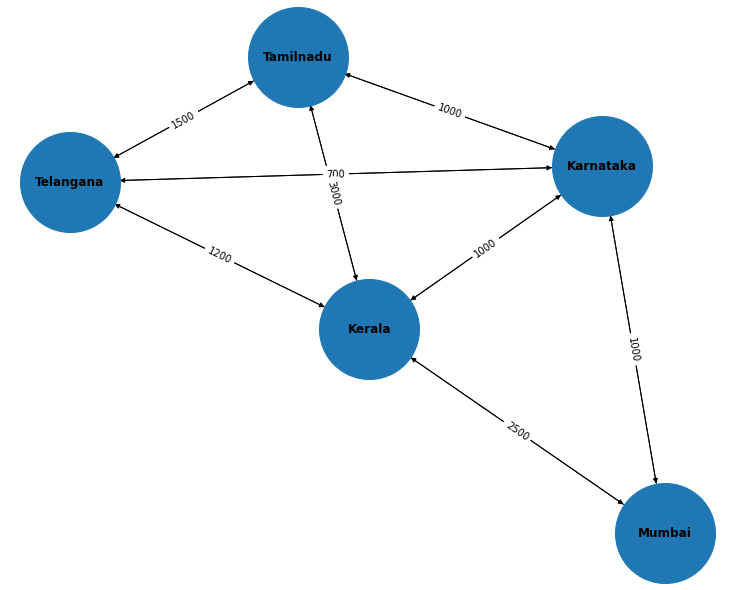

In [ ]:
G = createGraph(g)
plt.figure(figsize=(10,8))
pos = nx.spring_layout(G)
nx.draw(G, pos, node_size = 10000, with_labels=True, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'weight'))
plt.show()

# Adding new node

In [ ]:
g.add_node("Odissa")
g.add_edge("Odissa", "Telangana", 800)
g.add_edge("Odissa", "Kerala", 1000)

cost["Odissa"] = float("inf")
st_time = time.time()
parent1, cost1, bst1, q1 = dijkstra(g, "Tamilnadu", q, bst, parent, cost, update="Telangana")
end_time = time.time() - st_time

print("Time taken:",end_time,"sec")
print("Parent ->",dict(parent1))
print("Cost ->",dict(cost1))
print_path("Tamilnadu", g.nodes, parent1)

Time taken: 0.00021767616271972656 sec
Parent -> {'Tamilnadu': [], 'Karnataka': 'Tamilnadu', 'Telangana': 'Tamilnadu', 'Kerala': 'Telangana', 'Mumbai': 'Karnataka', 'Odissa': 'Telangana'}
Cost -> {'Tamilnadu': 0, 'Karnataka': 1000, 'Mumbai': 3000, 'Telangana': 1500, 'Kerala': 2700, 'Odissa': 2300}

Source to destination		Path
From Tamilnadu to Karnataka:	Tamilnadu -> Karnataka
From Tamilnadu to Mumbai:	Tamilnadu -> Karnataka -> Mumbai
From Tamilnadu to Telangana:	Tamilnadu -> Telangana
From Tamilnadu to Kerala:	Tamilnadu -> Telangana -> Kerala
From Tamilnadu to Odissa:	Tamilnadu -> Telangana -> Odissa


In [ ]:
st_time = time.time()
parent2, cost2, bst2, q2 = dijkstra(g, "Tamilnadu", q)
end_time = time.time() - st_time

print("Time taken:",end_time,"sec")
print("Parent ->",dict(parent2))
print("Cost ->",dict(cost2))
print_path("Tamilnadu", g.nodes, parent2)

Time taken: 0.0002665519714355469 sec
Parent -> {'Tamilnadu': [], 'Karnataka': 'Tamilnadu', 'Telangana': 'Tamilnadu', 'Kerala': 'Telangana', 'Mumbai': 'Karnataka', 'Odissa': 'Telangana'}
Cost -> {'Tamilnadu': 0, 'Karnataka': 1000, 'Mumbai': 3000, 'Telangana': 1500, 'Kerala': 2700, 'Odissa': 2300}

Source to destination		Path
From Tamilnadu to Karnataka:	Tamilnadu -> Karnataka
From Tamilnadu to Mumbai:	Tamilnadu -> Karnataka -> Mumbai
From Tamilnadu to Telangana:	Tamilnadu -> Telangana
From Tamilnadu to Kerala:	Tamilnadu -> Telangana -> Kerala
From Tamilnadu to Odissa:	Tamilnadu -> Telangana -> Odissa


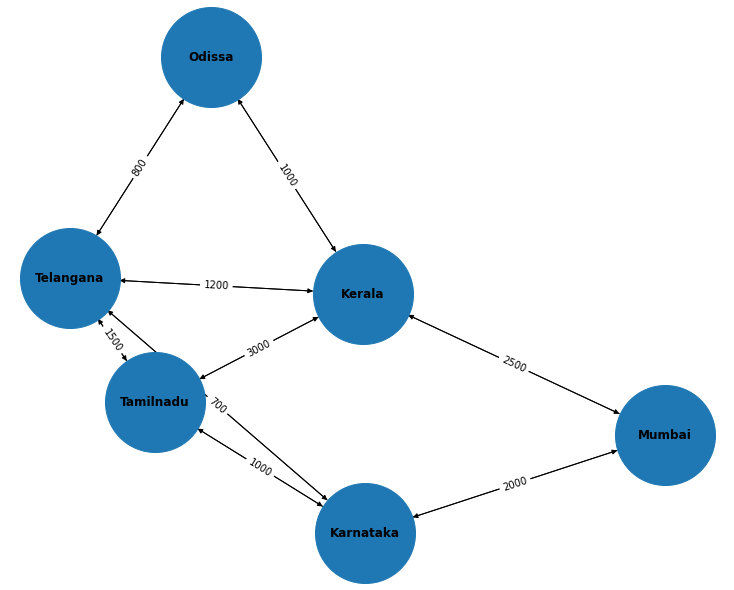

In [ ]:
G = createGraph(g)
plt.figure(figsize=(10,8))
pos = nx.spring_layout(G)
nx.draw(G, pos, node_size = 10000, with_labels=True, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'weight'))
plt.show()